In [1]:
import json
import matplotlib.pyplot as plt
from datetime import date, datetime


In [2]:
def calc_age(birthdate, at_date):
    age = at_date.year - birthdate.year - ((at_date.month, at_date.day) < (birthdate.month, birthdate.day))
    return age

In [3]:
file = open('german-bundestag.json')
members = json.load(file)
file.close()

years = range(1945, 2022)

members_at_year = dict()
    
for year in years:
    for m in members:
        current_date = datetime(year, 1, 1)
        start_date = datetime.strptime(m["start"], '%Y-%m-%dT%H:%M:%SZ')
        if "end" in m:
            end_date = datetime.strptime(m["end"], '%Y-%m-%dT%H:%M:%SZ')
        else:
            # fallback end date, assume member will be out of office after 4 years
            today = datetime.today()
            end_date = datetime(today.year + 4, today.month, today.day)
            
        if not year in members_at_year:
            members_at_year[year] = []
        
        if start_date <= current_date <= end_date:
            date_of_birth = datetime.strptime(m["dob"], '%Y-%m-%dT%H:%M:%SZ')
            age = calc_age(date_of_birth, current_date)
            members_at_year[year].append(age)

average_age_members=[]

for year, members in members_at_year.items():
    if len(members) == 0:
        average_age_members.append(0)
    else:    
        average_age_members.append(round(sum(members) / len(members)))
    

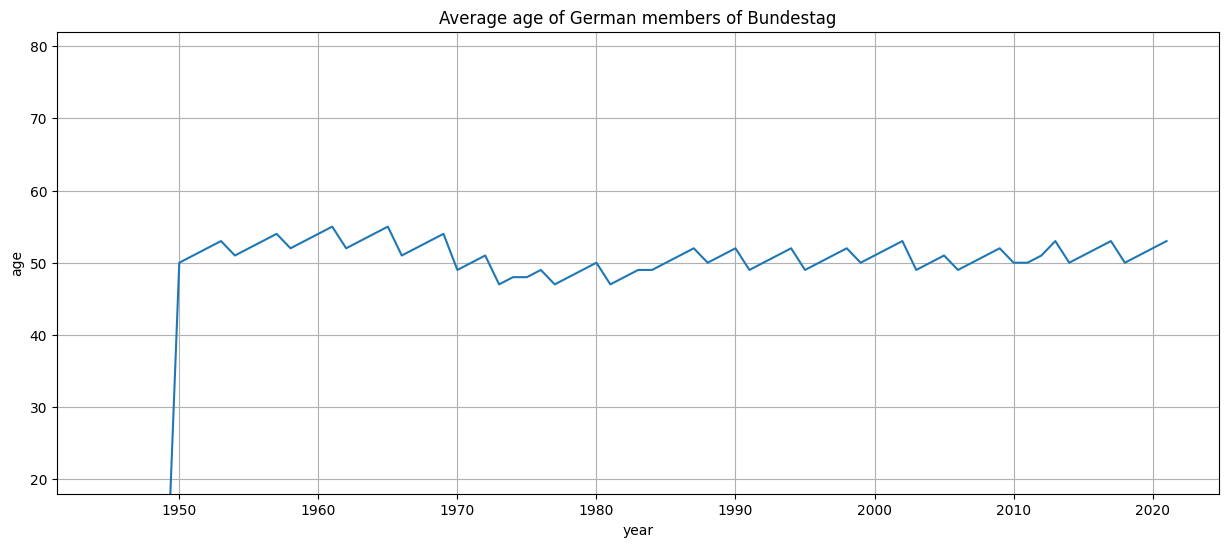

In [4]:
plt.subplots(figsize=(15, 6))

plt.plot(years, average_age_members)
plt.ylim(18, 82)
plt.grid()
plt.title("Average age of German members of Bundestag")
plt.ylabel("age")
plt.xlabel("year")
plt.show()
